In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import display

In [15]:
penguins = sns.load_dataset("penguins").dropna()
features = penguins[['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
labels = penguins['species']
features = pd.get_dummies(features, columns=['sex'])
penguins_data = features.copy()
penguins_data['species'] = labels
penguins_data = penguins_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [16]:
def split_data(data, test_size):
    X = data.drop(columns=['species'])
    y = data['species']
    return train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

ratios = [0.4, 0.6, 0.8, 0.9]
datasets = {}
for ratio in ratios:
    X_train, X_test, y_train, y_test = split_data(penguins_data, test_size=1 - ratio)
    datasets[f"{round(ratio*100)}/{round((1-ratio)*100)}"] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }


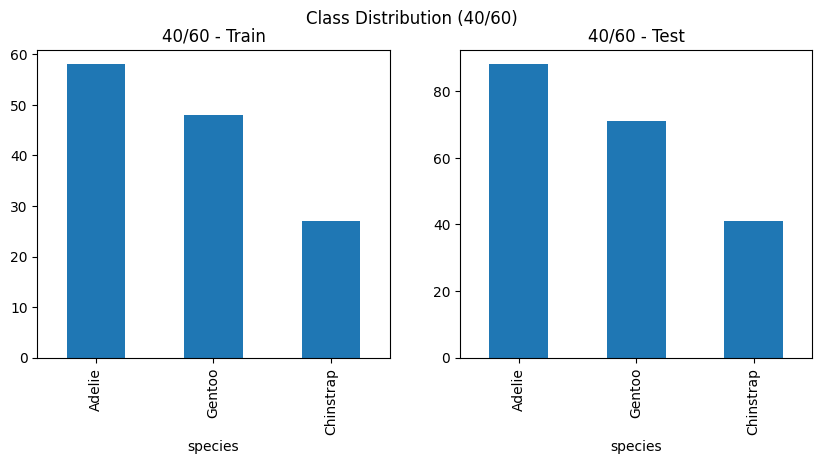

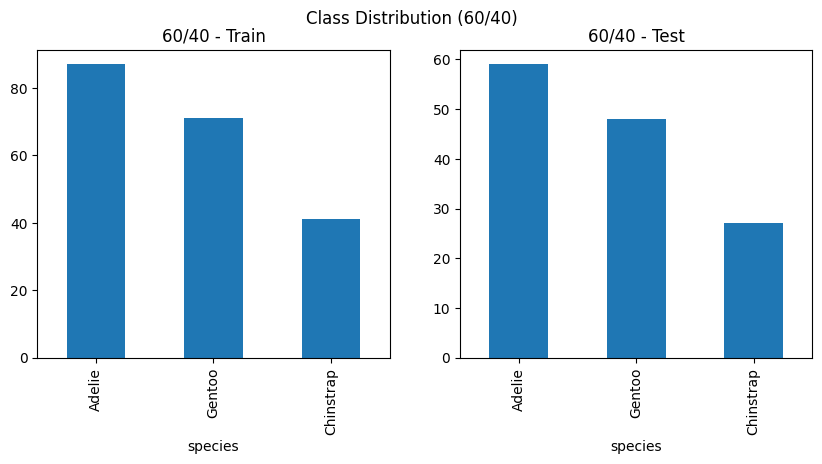

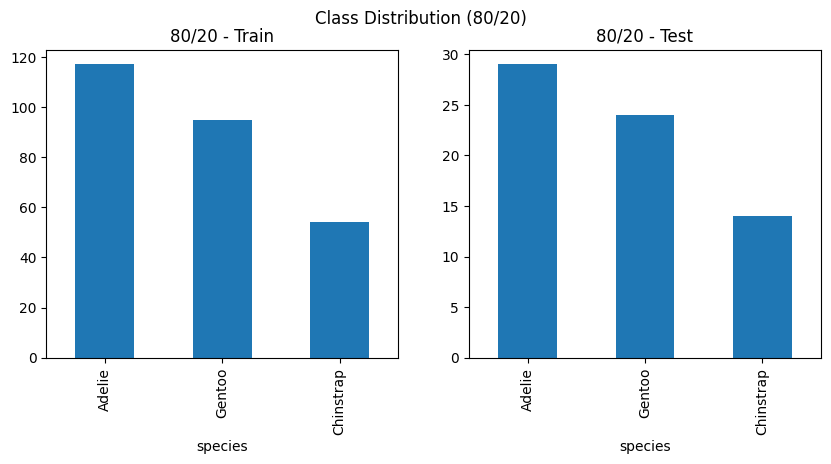

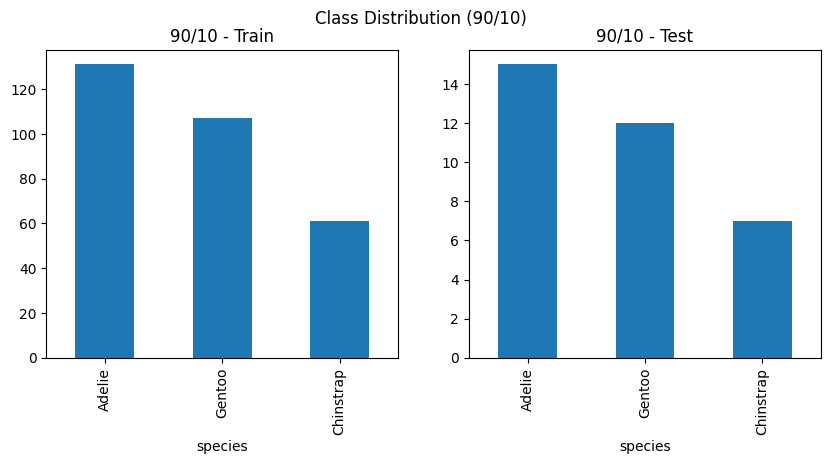

In [17]:
for key, data in datasets.items():
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    data['y_train'].value_counts().plot(kind='bar', ax=ax[0], title=f'{key} - Train')
    data['y_test'].value_counts().plot(kind='bar', ax=ax[1], title=f'{key} - Test')
    plt.suptitle(f'Class Distribution ({key})')
    plt.show()


Decision Tree (40/60)


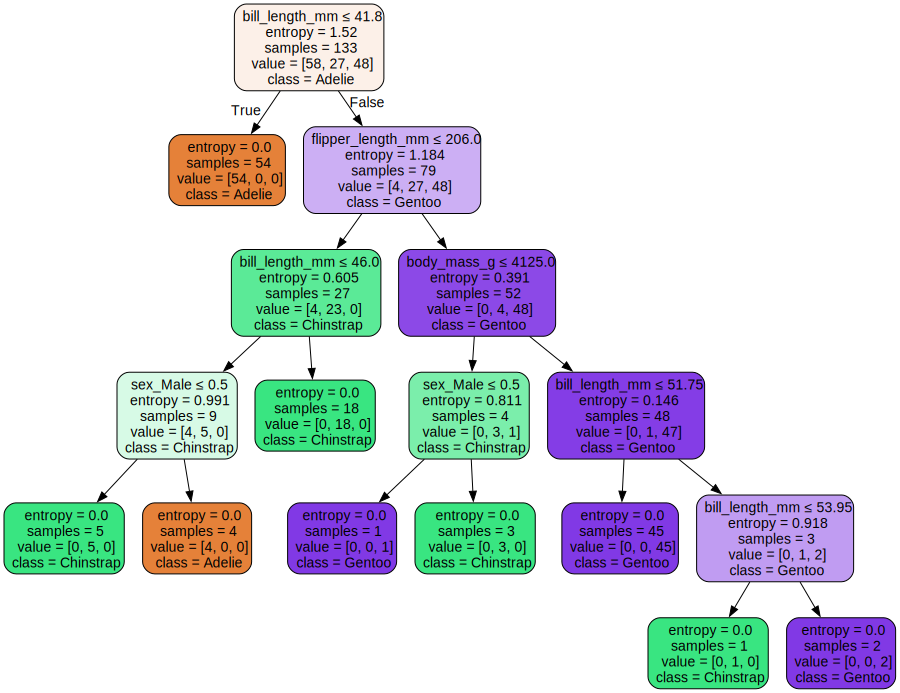

Decision Tree (60/40)


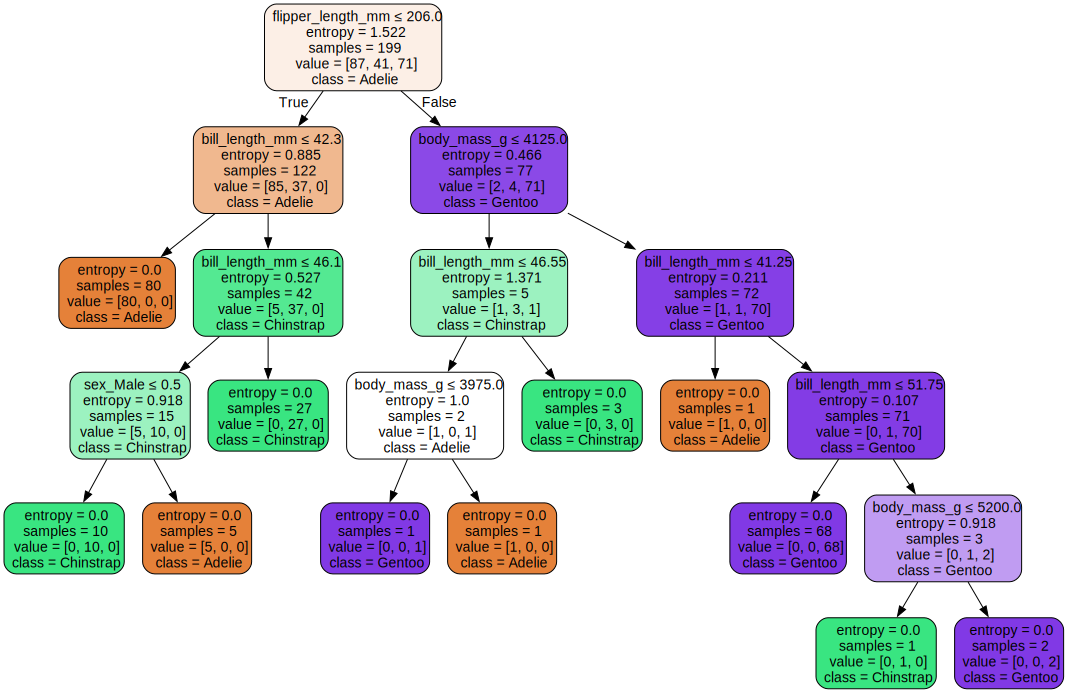

Decision Tree (80/20)


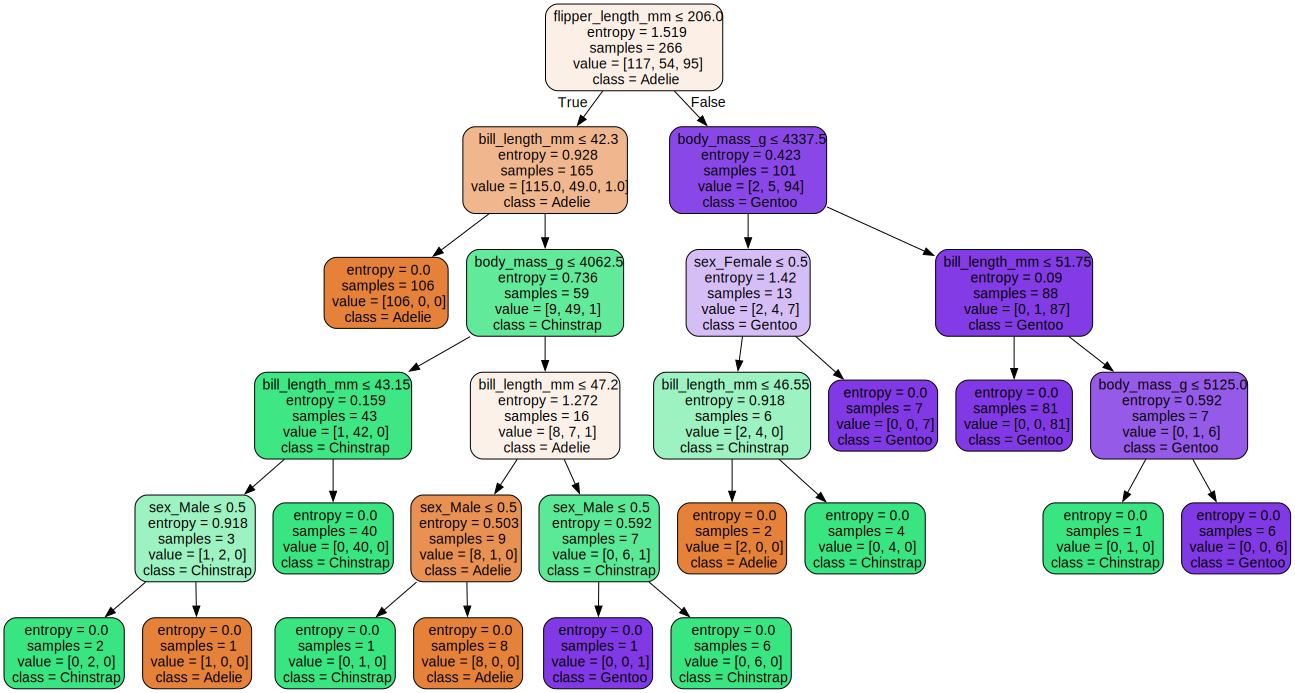

Decision Tree (90/10)


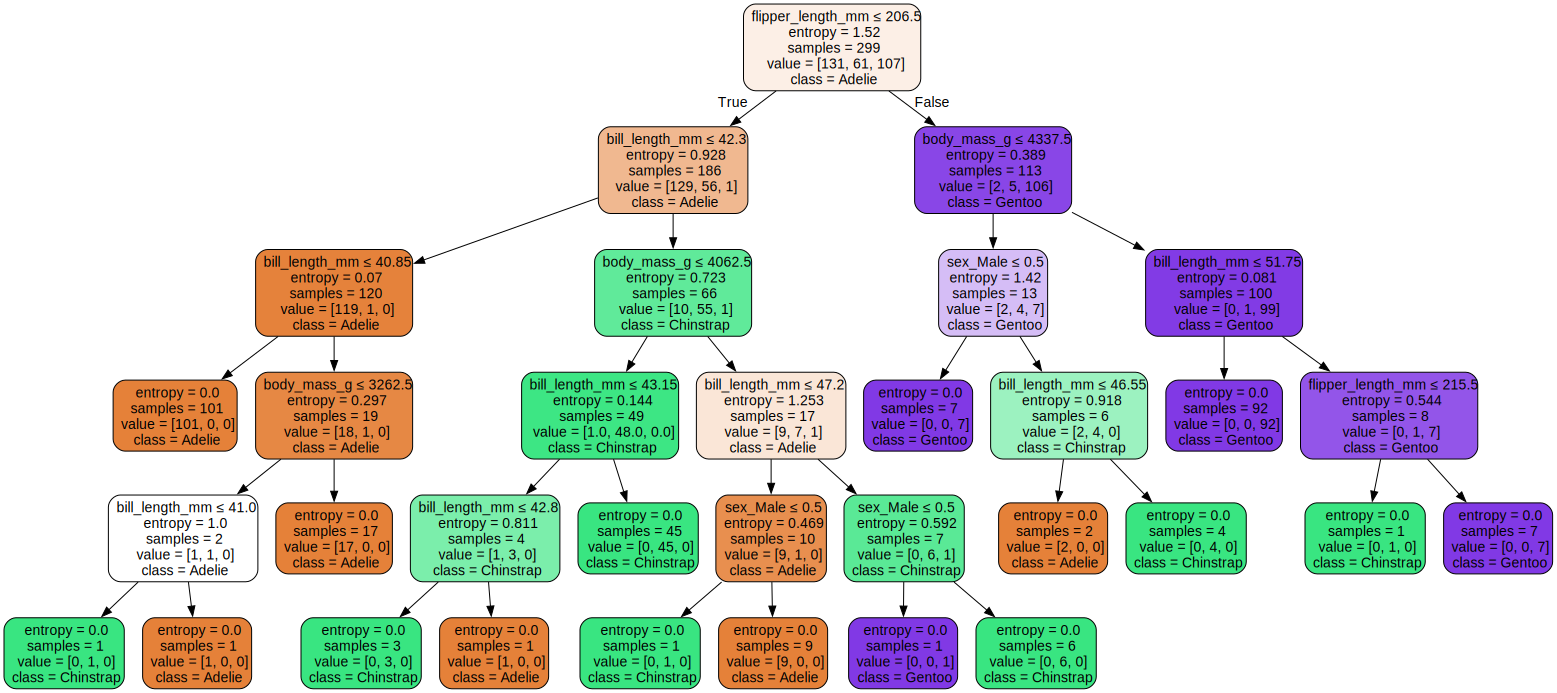

In [18]:
for key, data in datasets.items():
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(data['X_train'], data['y_train'])

    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=data['X_train'].columns,
        class_names=[str(cls) for cls in clf.classes_],
        filled=True,
        rounded=True,
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    print(f"Decision Tree ({key})")
    display(graph)



In [19]:
for key, data in datasets.items():
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(data['X_train'], data['y_train'])
    y_pred = clf.predict(data['X_test'])

    print(f"Dataset {key}")
    print("Classification Report:\n", classification_report(data['y_test'], y_pred))
    print("Confusion Matrix:\n", confusion_matrix(data['y_test'], y_pred))
    print("="*50)


Dataset 40/60
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.97      0.98      0.97        88
   Chinstrap       0.85      0.95      0.90        41
      Gentoo       0.98      0.90      0.94        71

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

Confusion Matrix:
 [[86  2  0]
 [ 1 39  1]
 [ 2  5 64]]
Dataset 60/40
Classification Report:
               precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        59
   Chinstrap       0.96      0.93      0.94        27
      Gentoo       0.98      0.96      0.97        48

    accuracy                           0.97       134
   macro avg       0.97      0.96      0.97       134
weighted avg       0.97      0.97      0.97       134

Confusion Matrix:
 [[59  0  0]
 [ 1 25  1]
 [ 1  1 46]]
Dataset 80/20
Classification Report:
             

📌 Decision Tree (max_depth=None)


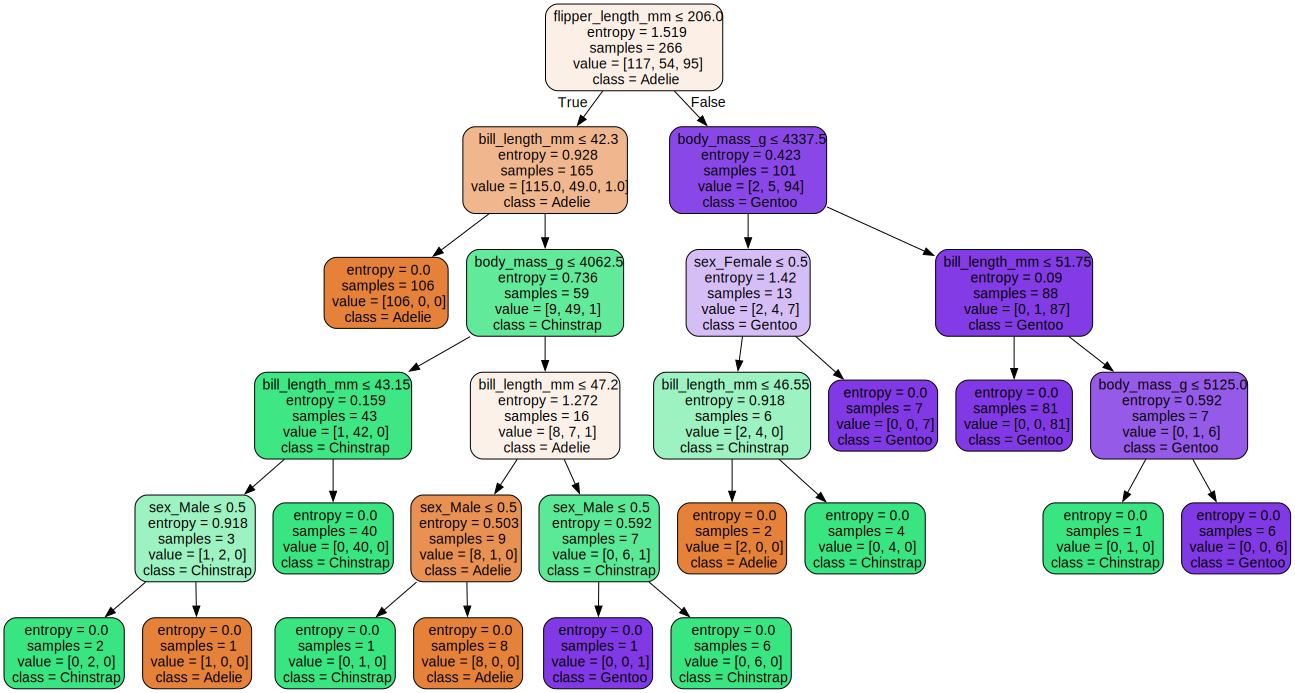

📌 Decision Tree (max_depth=2)


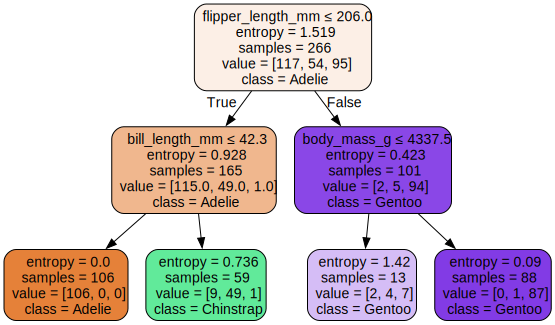

📌 Decision Tree (max_depth=3)


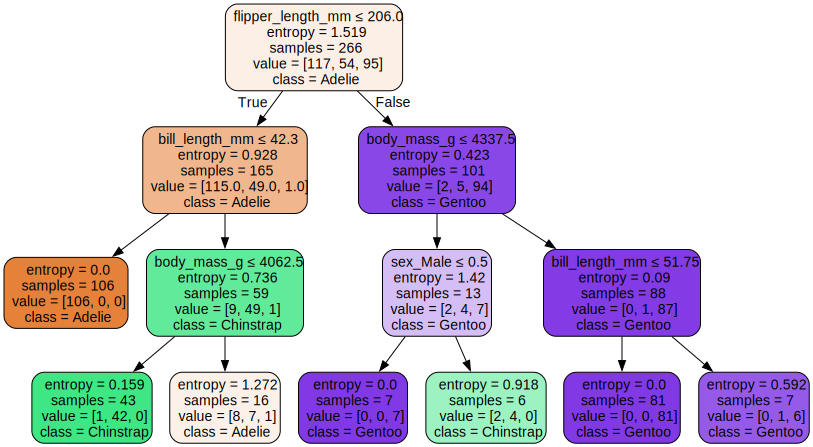

📌 Decision Tree (max_depth=4)


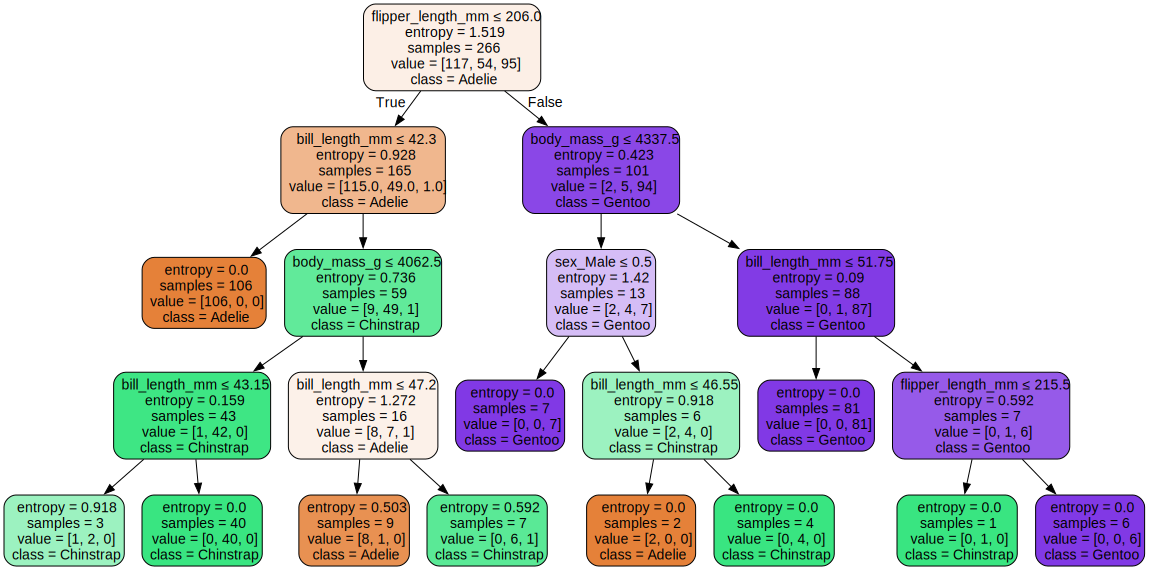

📌 Decision Tree (max_depth=5)


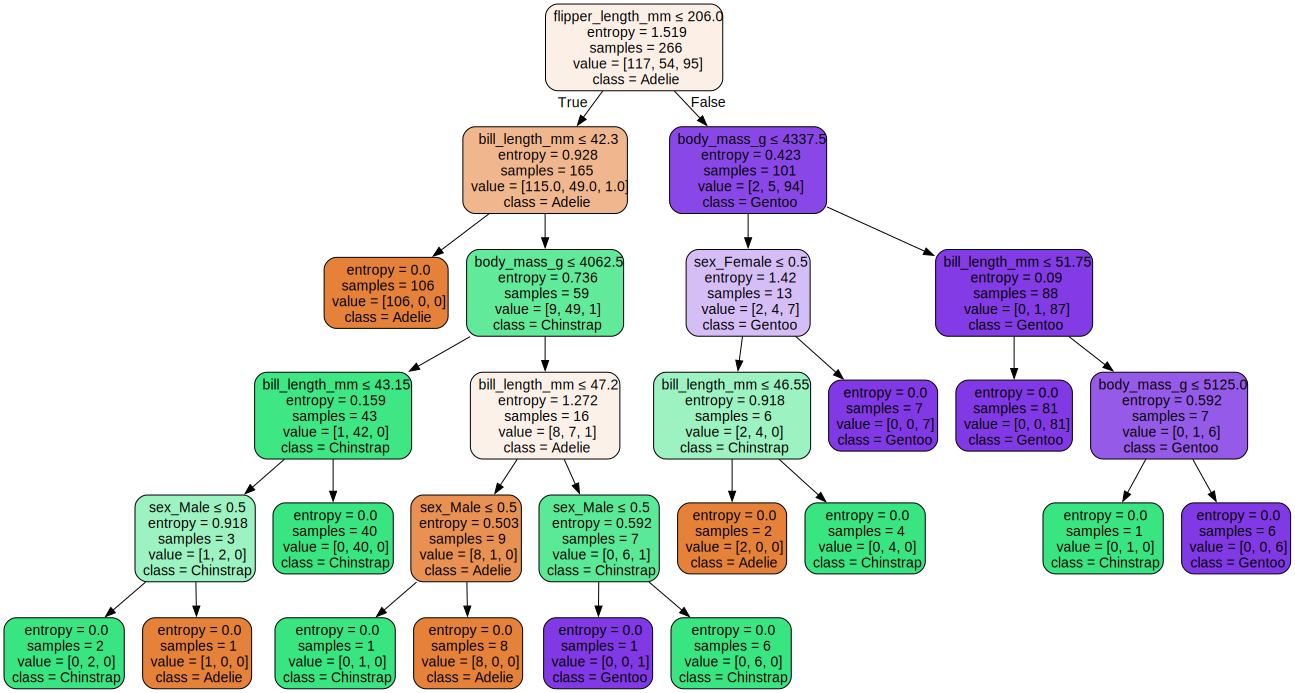

📌 Decision Tree (max_depth=6)


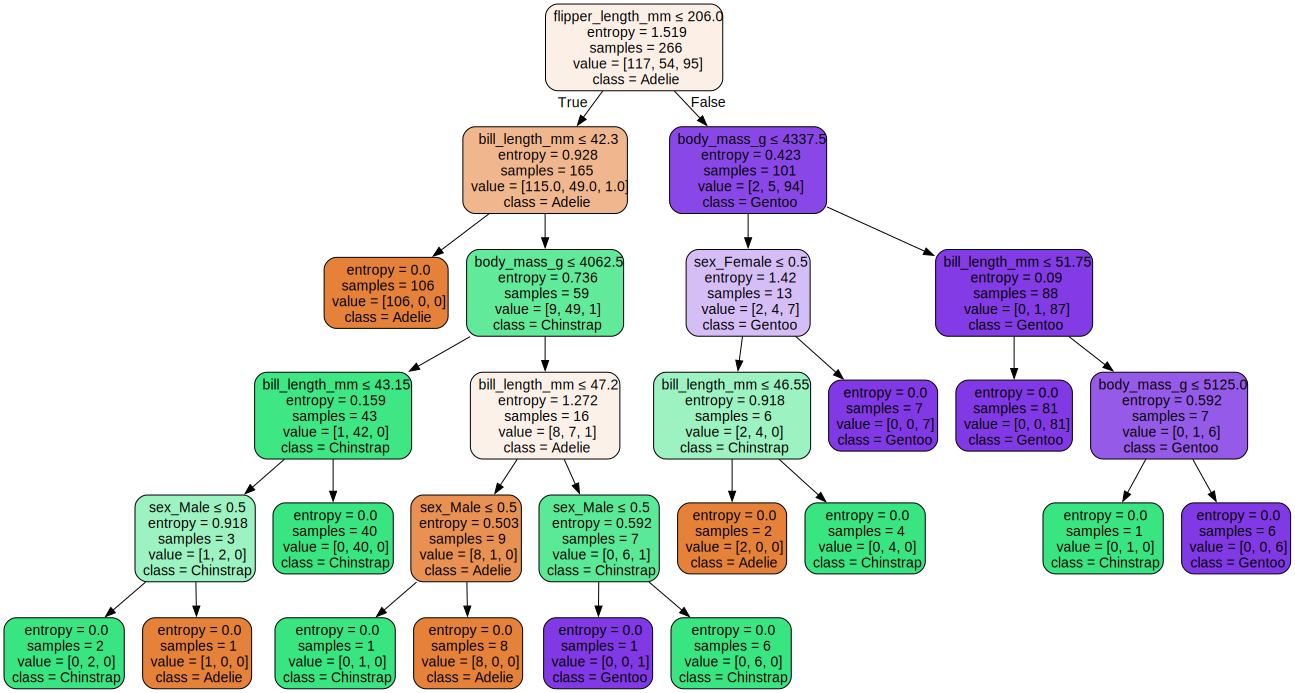

📌 Decision Tree (max_depth=7)


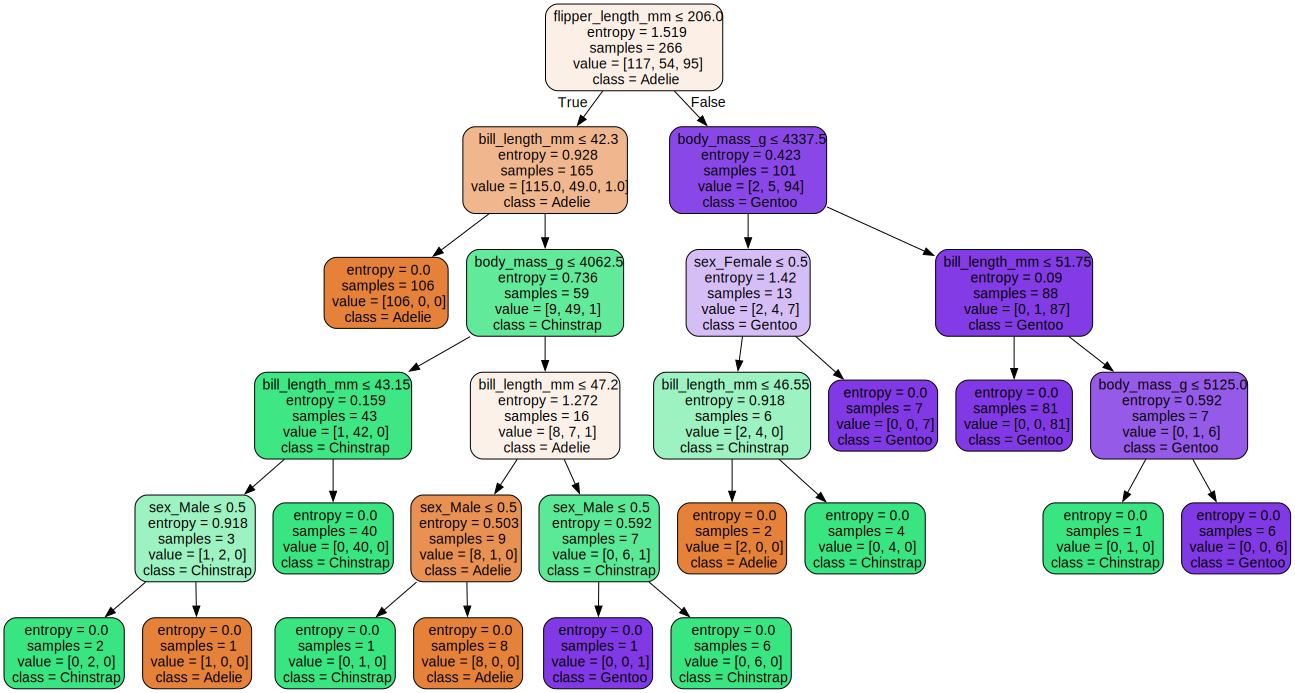

   max_depth  Accuracy
0        NaN  0.985075
1        2.0  0.955224
2        3.0  0.970149
3        4.0  0.985075
4        5.0  0.985075
5        6.0  0.985075
6        7.0  0.985075


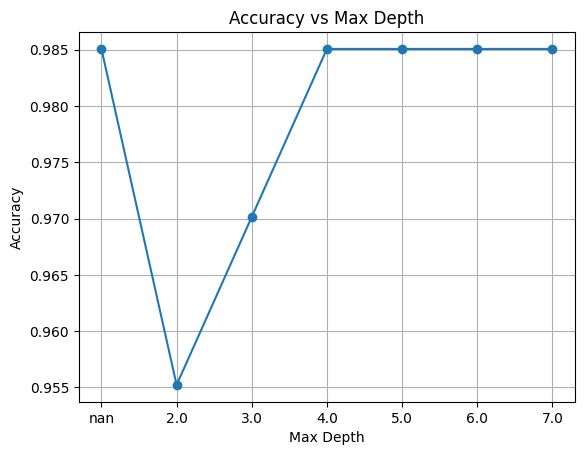

In [20]:
depth_results = []
depths = [None, 2, 3, 4, 5, 6, 7]
X_train = datasets['80/20']['X_train']
y_train = datasets['80/20']['y_train']
X_test = datasets['80/20']['X_test']
y_test = datasets['80/20']['y_test']

for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    depth_results.append((d, acc))

    # Visualization with Graphviz
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=X_train.columns,
        class_names=clf.classes_,
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    print(f"📌 Decision Tree (max_depth={d})")
    display(graph)

depth_df = pd.DataFrame(depth_results, columns=["max_depth", "Accuracy"])
print(depth_df)
plt.plot(depth_df["max_depth"].astype(str), depth_df["Accuracy"], marker="o")
plt.title("Accuracy vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()